---
# Bioinformatics Algorithms - Course IV

## *Finding Mutations in DNA and Proteins*
---
<br>

---

In [3]:
# Imports:

import networkx as nx
import matplotlib.pyplot as plt
import time

# 1.2 (9a) - Trie Construction for Pattern Matching
---

## *Constructing a trie*  

The reason why the runtime of BruteForcePatternMatching is so high is that each string in Patterns must traverse all of Text independently. If you think about Text as a long road, then BruteForcePatternMatching is analogous to loading each pattern into its car when driving along Text, an inefficient strategy. Instead, our goal is to herd the patterns onto a bus so that we only need to make one trip from the beginning to the end of Text. In more formal terms, we would like to organize Patterns into a data structure to prevent multiple passes down Text and to reduce the runtime. To this end, we will consolidate Patterns into a directed tree called a trie (pronounced “try”), which is written Trie(Patterns) and has the following properties (see the figure on the next step).

- The trie has a single root node with indegree 0, denoted *root*; all other nodes have indegree 1.  
- Each edge of Trie(Patterns) is labeled with a letter of the alphabet.  
- Edges leading out of a given node have distinct labels.  
- Every string in Patterns is spelled out by concatenating the letters along some path from the root downward.  
- Every path from the root to a leaf, or node with outdegree 0, spells a string from Patterns.  

![Trie](http://bioinformaticsalgorithms.com/images/BWT/trie.png)

### Trie Construction Problem: Construct a trie from a set of patterns.

Input: A collection of strings Patterns.  

Output: Trie(Patterns).  

The most obvious way to construct Trie(Patterns) is by iteratively adding each string from Patterns to the growing trie, as implemented  
by the following algorithm.

#### *Pseudocode*

`
TRIECONSTRUCTION(Patterns):
    Trie ← a graph consisting of a single node root
    for each string Pattern in Patterns
        currentNode ← root
        for i ← 1 to |Pattern|
            if there is an outgoing edge from currentNode with label currentSymbol
                currentNode ← ending node of this edge
            else
                add a new node newNode to Trie
                add a new edge from currentNode to newNode with label currentSymbol
                currentNode ← newNode
    return Trie
`

---
####  *TrieConstruction(Patterns) Algorithm*
---

`  
def TrieConstruction(Patterns):  
    Trie = {0:{}}  
    for pattern in Patterns:  
    currentNode = 0  
    for i in range(len(pattern)):  
        if pattern[i] in Trie[currentNode].keys():  
            currentNode = Trie[currentNode][pattern[i]]  
        else:  
            newNode = len(Trie.keys())  
            Trie[newNode] = {}  
            Trie[currentNode][pattern[i]] = newNode  
            currentNode = newNode  
    print("\n\nfinished trie-------------\n\n")  
    for node in Trie.keys():  
        for base in Trie[node].keys():  
            line = str(node) + '->' + str(Trie[node][base]) + base  
            print(line)
    return Trie  `

---
## TrieConstruction()
---

In [4]:
# Isn't able to disambiguate when one Pattern is prefix of another! Strings assumed to be equal length

def TrieConstruction(Patterns): 
    
    Trie = {0:{}}

    for pattern in Patterns:
        currentNode = 0
        for i in range(len(pattern)):
            if pattern[i] in Trie[currentNode].keys():
                currentNode = Trie[currentNode][pattern[i]]
            else:
                newNode = len(Trie.keys())
                Trie[newNode] = {}
                Trie[currentNode][pattern[i]] = newNode
                currentNode = newNode

    return Trie

---
### Code Challenge: Solve the Trie Construction Problem.
---

Input: A collection of strings Patterns.

Output: The adjacency list corresponding to Trie(Patterns), in the following format. 
If Trie(Patterns) has n nodes, first label the root with 0 and then label the remaining
nodes with the integers 1 through n - 1 in any order you like.  

Each edge of the adjacency list of Trie(Patterns) will be encoded by a triple: 
the first two members of the triple must be the integers labeling the initial and terminal nodes of the edge, respectively; the third member of the triple must be the symbol labeling the edge.

Patterns = ['ATAGA','ATC','GAT']

finished trie

-------------  
0->1:A  
0->7:G  
1->2:T  
2->3:A  
2->6:C  
3->4:G  
4->5:A  
7->8:A  
8->9:T  

---
## Coursera test data:
---

In [5]:
# set working dir: 
%cd /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/

# Coursera dataset
Patterns = []
with open("data/rosalind_ba9g.txt",'r') as file:
    for line in file.readlines():
        Patterns.append(line.strip())

Trie = TrieConstruction(Patterns)

# with open('9Aout.txt', 'w') as outputf:
#     output = ""
#     for node in Trie.keys():
#         for base in Trie[node].keys():
#             line = str(node) + '->' + str(Trie[node][base]) +':' + base
#             output += line+'\n'
#     outputf.write(output)

/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6


<br>

<br>

---
# 1.3 (9b) - PrefixTrieMatching   
---



### Applying the trie to multiple pattern matching -> **PrefixTrieMatching.**


- Given a string Text and Trie(Patterns), we can quickly check whether any string from Patterns matches a prefix of Text. 

- To do so, we start reading symbols from the beginning of Text and see what string these symbols “spell” as we proceed along the path downward from the root of the trie, as illustrated in the figure below. 

- For each new symbol in Text, if we encounter this symbol along an edge leading down from the present node, then we continue along this edge; otherwise, we stop and conclude that no string in Patterns matches a prefix of Text. 

- If we make it all the way to a leaf, then the pattern spelled out by this path matches a prefix of Text.



![](http://bioinformaticsalgorithms.com/images/BWT/trie_threading_1.png)

**STOP and Think:**  
For PrefixTrieMatching to work, we have made a hidden assumption that:
  
  - no string in Patterns is a prefix of another string in Patterns (or, for that matter, longer than Text). 
  
How can it be modified when Patterns is an arbitrary collection of strings?  
Hint: consider adding "pantry" to the patterns in the trie from the previous step.

---
## Fix prefix within Pattern problem for TrieConstruction
---

Try - adding a 'match' tag to leaf node before an edge gets added to the empty leaf and makes it impossible to know a seq ended there

---

In [13]:
# fixing TrieConstruction to work with prefixes of Patterns within Patterns

def TrieConstruction2(Patterns):  # verbose output

    Trie = {0:{}}
    for pattern in Patterns:
        currentNode = 0
        for i in range(len(pattern)):
            if pattern[i] in Trie[currentNode].keys():
                currentNode = Trie[currentNode][pattern[i]]
            else:
                newNode = len(Trie.keys())
                Trie[newNode] = {}
                Trie[currentNode][pattern[i]] = newNode
                currentNode = newNode
        Trie[currentNode]['Match'] = ''
    
#    print("\n\nfinished trie-------------\n\n")
#    for node in Trie.keys():
#        for base in Trie[node].keys():
#            line = str(node) + '->' + str(Trie[node][base]) + ':' + base
#            print(line)

    return Trie

In [14]:
Patterns = ["ananas", "and", "antenna", "banana", "bandana", "nab", "nana", "pan"]
Trie = TrieConstruction(Patterns)
for key in Trie.keys():
    print(key, Trie[key])

0 {'a': 1, 'b': 13, 'n': 23, 'p': 28}
1 {'n': 2}
2 {'a': 3, 'd': 7, 't': 8}
3 {'n': 4}
4 {'a': 5}
5 {'s': 6}
6 {}
7 {}
8 {'e': 9}
9 {'n': 10}
10 {'n': 11}
11 {'a': 12}
12 {}
13 {'a': 14}
14 {'n': 15}
15 {'a': 16, 'd': 19}
16 {'n': 17}
17 {'a': 18}
18 {}
19 {'a': 20}
20 {'n': 21}
21 {'a': 22}
22 {}
23 {'a': 24}
24 {'b': 25, 'n': 26}
25 {}
26 {'a': 27}
27 {}
28 {'a': 29}
29 {'n': 30}
30 {}


In [15]:
# with pantry

Patterns = ["ananas", "and", "antenna", "banana", "bandana", "nab", "nana", "pan", "pantry"]
Trie = TrieConstruction(Patterns)
print(30, Trie[30])
for key in Trie.keys():
    print(key, Trie[key])
Trie2 = TrieConstruction2(Patterns)
print(30, Trie2[30])  
for key in Trie2.keys():
    print(key, Trie2[key])

30 {'t': 31}
0 {'a': 1, 'b': 13, 'n': 23, 'p': 28}
1 {'n': 2}
2 {'a': 3, 'd': 7, 't': 8}
3 {'n': 4}
4 {'a': 5}
5 {'s': 6}
6 {}
7 {}
8 {'e': 9}
9 {'n': 10}
10 {'n': 11}
11 {'a': 12}
12 {}
13 {'a': 14}
14 {'n': 15}
15 {'a': 16, 'd': 19}
16 {'n': 17}
17 {'a': 18}
18 {}
19 {'a': 20}
20 {'n': 21}
21 {'a': 22}
22 {}
23 {'a': 24}
24 {'b': 25, 'n': 26}
25 {}
26 {'a': 27}
27 {}
28 {'a': 29}
29 {'n': 30}
30 {'t': 31}
31 {'r': 32}
32 {'y': 33}
33 {}
30 {'Match': '', 't': 31}
0 {'a': 1, 'b': 13, 'n': 23, 'p': 28}
1 {'n': 2}
2 {'a': 3, 'd': 7, 't': 8}
3 {'n': 4}
4 {'a': 5}
5 {'s': 6}
6 {'Match': ''}
7 {'Match': ''}
8 {'e': 9}
9 {'n': 10}
10 {'n': 11}
11 {'a': 12}
12 {'Match': ''}
13 {'a': 14}
14 {'n': 15}
15 {'a': 16, 'd': 19}
16 {'n': 17}
17 {'a': 18}
18 {'Match': ''}
19 {'a': 20}
20 {'n': 21}
21 {'a': 22}
22 {'Match': ''}
23 {'a': 24}
24 {'b': 25, 'n': 26}
25 {'Match': ''}
26 {'a': 27}
27 {'Match': ''}
28 {'a': 29}
29 {'n': 30}
30 {'Match': '', 't': 31}
31 {'r': 32}
32 {'y': 33}
33 {'Match': ''}


In [35]:

plt.figure(figsize=(12,12)) 
G = nx.DiGraph()
Labels = {}

for v in Trie.keys():
    for u in Trie[v].keys():
        G.add_edge(v,Trie[v][u])
        Labels[(v,Trie[v][u])] = u
           
CMAP=[]
for node in G.nodes():
    print(node, node in Trie.keys(), G.degree[node])
    
    if G.degree[node]==1:
        CMAP.append(0.9)
    elif node == 1:
        CMAP.append(0.7)
    else:
        CMAP.append(0.4)

    
print(CMAP, len(G), len(CMAP))

0 True 4
1 True 2
13 True 2
23 True 2
28 True 2
2 True 4
3 True 2
7 True 1
8 True 2
4 True 2
5 True 2
6 True 1
9 True 2
10 True 2
11 True 2
12 True 1
14 True 2
15 True 3
16 True 2
19 True 2
17 True 2
18 True 1
20 True 2
21 True 2
22 True 1
24 True 3
25 True 1
26 True 2
27 True 1
29 True 2
30 True 2
31 True 2
32 True 2
33 True 1
[0.4, 0.7, 0.4, 0.4, 0.4, 0.4, 0.4, 0.9, 0.4, 0.4, 0.4, 0.9, 0.4, 0.4, 0.4, 0.9, 0.4, 0.4, 0.4, 0.4, 0.4, 0.9, 0.4, 0.4, 0.9, 0.4, 0.9, 0.4, 0.9, 0.4, 0.4, 0.4, 0.4, 0.9] 34 34


<Figure size 864x864 with 0 Axes>

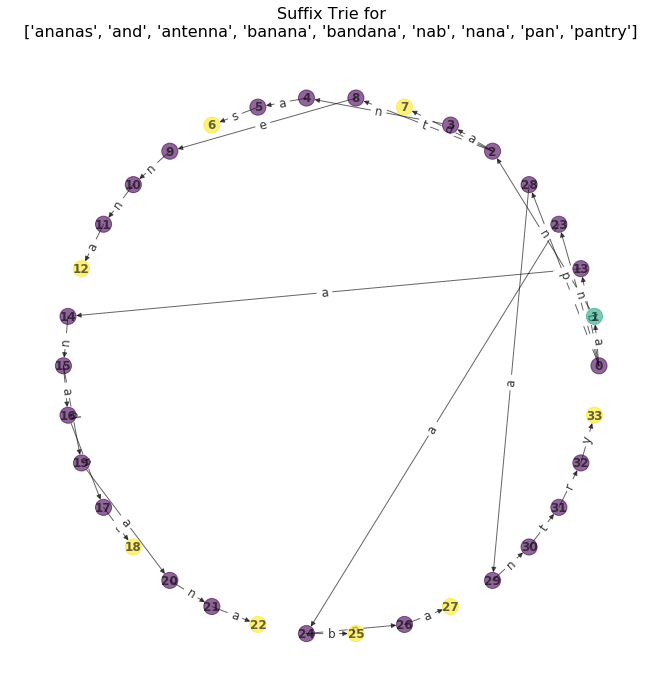

In [36]:

plt.figure(figsize=(9,9)) 

nx.draw_circular(G, node_color= CMAP, font_weight='bold', with_labels=True, 
               node_size = 260, font_size=12, alpha=0.6, cmap=plt.cm.viridis)

nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), edge_labels=Labels, 
                             font_size=12, alpha = 0.8)
plt.title("Suffix Trie for\n{}".format(Patterns), size =16)
plt.show()

---
## Pseudocode
---

`
PrefixTrieMatching(Text, Trie)
    symbol ← first letter of Text
    v ← root of Trie
    while forever
        if v is a leaf in Trie
            output the pattern spelled by the path from the root to v
        else if there is an edge (v, w) in Trie labeled by symbol
            symbol ← next letter of Text
            v ← w
        else
            return "no matches found"
`            

**PrefixTrieMatching** finds whether any strings in Patterns match a prefix of Text.    

To find whether any strings in Patterns match a substring of Text starting at position i,
this algorithm must match a prefix of the suffix of Text starting at position i.  

We can therefore run PrefixTrieMatching on all suffixes of Text.  (text[i:] for i in range(|text|)
As a result, to solve the Multiple Pattern Matching Problem, we simply iterate PrefixTrieMatching
|Text| times, chopping the first symbol off of Text before each new iteration

`
TrieMatching(Text, Trie)
    while Text is nonempty
        PrefixTrieMatching(Text, Trie)
        remove first symbol from Text
`

---
---

---
## TrieMatching algorithm
---

In [21]:
def TrieConstruction2(Patterns): 
    Trie = {0:{}}
    for pattern in Patterns:
        currentNode = 0
        for i in range(len(pattern)):
            if pattern[i] in Trie[currentNode].keys():
                currentNode = Trie[currentNode][pattern[i]]
            else:
                newNode = len(Trie.keys())
                Trie[newNode] = {}
                Trie[currentNode][pattern[i]] = newNode
                currentNode = newNode
        Trie[currentNode]['Match'] = ''
    return Trie

def PrefixTrieMatching(Text, Trie):

    Matches = []
    string = Text[0]
    Text = Text[1:]
    v = 0
    while True:
        if len(Text) == 0:
            return string
        elif 'Match' in Trie[v].keys(): 
            return string
        elif string[-1] in Trie[v].keys():
            v = Trie[v][string[-1]]
            string += Text[0]
            Text = Text[1:]
        else:
            return
            
def TrieMatching(Text, Trie):
    
    L = len(Text)
    matches = []
    
    for i in range(L):
        matches.append(PrefixTrieMatching(Text,Trie))
        Text = Text[1:]
    
    return matches

---
## Problem Sets - 9B
---

In [37]:
# Sample dataset

%cd /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/
Patterns = []
with open("data/rosalind_ba9b.txt",'r') as file:
    Text = file.readline().strip()
    for line in file.readlines():
        Patterns.append(line.strip())
print(Text)
print('\n')
print(Patterns)
print('\n')

Trie = TrieConstruction2(Patterns)
for key in Trie.keys():
    print(key, Trie[key])
print('\n')
    
matches = TrieMatching(Text, Trie)
print(matches)
print('\n')
match = ''
for i in range(len(matches)-len(Patterns[0])+1):
    if matches[i]:
        match += str(i) + ' '
        print(matches[i])
print('\n')
print(match)
print('\n')


/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6
ATACAAGACCCAAGACCCAACAATGATTTCATGGTATCACTTCAATGTCAACGCAAGACGACAGACGACAGCAACTCATACTCCACATAGTTACATGAGATTGAGGGATGAGGGATGTCGTAGTCAACGAAGACGTCAGGAACTGACCAATGGGCAGACGACAGAGGGATGACCCAAGACCCAAACAGGCGCGAGGCGCGAGGCCCTGAAATCACTTCGTACTGGCTGAGAAGGCCTCAGACGACAGATGCTCGACCATGGACGAATGCTCGTACAACCGATGGCCCGCCCAAGGAGCCCTGATGTTCTGAGGGATGAGGGATGTCGGTCGGAATTTAGGAGTACGGACCGTAGTAAGGCATTAATGGATTGGTGAGCCCTTCCCCTTCTGCTTTTCAGGTAGCAACAAGACCCAAGACCCACGCAGGCGCGAGAAGACATATCGGCCAACGAACACTGCTCCCTGCCTAGGTACATGGGAGTAGTCATCCAGTGAGGGATGAGGGATGGGATGGTGCACGCAGGCGCGAGGCGCGAGAGGCACATAAGGCGCGAGGCGCGAGTAGTCCTCGAGGTCACAGGATCTGTGACAATCGCTCCCTGCTCCCTGCACTTTGAACTATGCCGAGAATTCCGAGATTATTCACGTGAGACGACAGACGACAGCGAGGCGCGAGGCGATTTCGCCCCTGTCCCAGACGACAGACGACAGAGATAGCGATGCAGTTACGAGCGCCGATCCTGGTATTTTAAATCCCGTGCGGTAAATATCCGTCTAGAGAGTCCGACTTAGTGCAGCCAAGACCCAAGACCCATGCCCGCGGGTTGTGCAACGAGAGCCCTGAGCCCTGACGAATGATAGTGACAGGCTGATACGTGGATTCTCAGAGGGGTCGAGGATGATCAACCTTATACACC


['GCTCCC

NameError: name 'TrieMatching' is not defined

In [23]:
# Coursera dataset
%cd /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/

Patterns = []
with open("data/dataset_294_8.txt",'r') as file:
    Text = file.readline().strip()
    for line in file.readlines():
        Patterns.append(line.strip())

print('\nPATTERNS:\n')
for pattern in Patterns:
    print(pattern)

#
Trie = TrieConstruction2(Patterns)
matches = TrieMatching(Text, Trie)
match = ''
for i in range(len(matches)-len(Patterns[0])+1):
    if matches[i]:
        match += str(i) + ' '

print('\
\n--------------------------------------------------\n \
\n------- Indices of all matches Pattern|Text ------\n \
\n--------------------------------------------------\n\n')
print(match)

/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6

PATTERNS:

ATAGAAAAT
TGTTCAATG
CATCGGACA
TCCGTTCTC
GCTGGTGGC
TAACACCTA
AGGTTCAAG

--------------------------------------------------
 
------- Indices of all matches Pattern|Text ------
 
--------------------------------------------------


154 161 618 625 1431 1438 1791 1798 1943 1950 2538 2545 2585 2592 2684 2887 2900 3036 3112 3119 3204 3211 3772 3779 3944 3951 4262 4269 4453 4460 4550 4557 5152 5159 5243 5416 5423 6573 6580 6668 6675 6752 6759 6888 7020 7108 7460 7958 8062 8069 8203 8490 8497 


<br> 

---
## Check out the Aho-Corasick algorithm for improved TrieMatching()
---

-  We need |Patterns| steps to construct Trie(Patterns), which contains at most |Patterns|+1 nodes. 
-  Each iteration of PrefixTrieMatching takes at most |LongestPattern| steps, where LongestPattern is the longest string in Patterns.  
-  TrieMatching makes |Text| total calls to PrefixTrieMatching, making the total number of steps equal to |Patterns| + |Text| · |LongestPattern|.  
-  This runtime offers a speed-up compared to the |Text| · |Patterns| steps required by BruteForcePatternMatching.
-  The Aho-Corasick algorithm, developed in 1975, further reduces the number of steps required after constructing the trie from O(|Text| · |LongestPattern|) steps to O(|Text|) steps. For more details, see "DETOUR: The Aho-Corasick Algorithm" in the print companion.

**STOP and Think**: Do you see any computational challenges with using TrieMatching to solve the Multiple Pattern Matching Problem?

<br>

---
## Memory considerations
---

- Although TrieMatching is fast, storing a trie consumes a lot of memory. - Recall that BruteForcePatternMatching works with a single read at a time, which keeps the memory low because we only need to store the genome in memory. 
  
- Yet TrieMatching needs to store the entire trie in memory, which is proportional to |Patterns|. 
-  Since a collection of reads for the human genome may consume upwards of 1 TB, the memory required to store the trie is prohibitive.  
  
**STOP and Think**: How can we avoid multiple passes through the genome without needing to consolidate all the reads into a huge data structure? -> use k-mers, Burrows Wheeler Transform...

<br>

---
## Created Module of Pattern Match using Tries functions into trie_matcher.py
---  


In [4]:
import trie_matcher

In [5]:
help(trie_matcher)

Help on module trie_matcher:

NAME
    trie_matcher - "trie_matcher.py"

DESCRIPTION
    Pattern search algorithm using Trie data-structure to enhance speed.
    
    Increases memory usage considerably compared to brute-force sliding window pattern matching.
    
    
    
    INPUT: -> text file with first line = query Text; 2nd -> n-th lines: each line is Pattern text query
    
    
    
    Returns a list of the starting indices of exact matches found in Text

FUNCTIONS
    PrefixTrieMatching(Text, Trie)
        Subroutine for TrieMatching, tries to find a path in Trie to match from start of input Text suffix
    
    TrieConstruction(Patterns)
        Constructs a Trie from a list of text patterns using digraph adjacency list in dict with edges labelled by symbols
    
    TrieMatching(Text, Trie)
        Slides over Text once, querying PrefixTrieMatching to ascertain whether a pattern in Tree matches text at position i. Returns a list of length |Text| where each entry is the mat

<br>  
<br>  

---

<br>

# BA9C - Suffix Trie

---


## Introduction to suffix tries
---
<br>

**Since storing Trie(Patterns) requires so much memory**, let’s **process Text into a data structure** instead. 

Our goal is to compare each string in Patterns against Text without needing to to traverse Text from beginning to end. In more familiar terms, instead of packing Patterns onto a bus and riding the long distance down Text, our new data structure will be able to “teleport” each string in Patterns directly to its occurrences in Text.

<br>

---
A suffix trie:
---

<br>

+  denoted SuffixTrie(Text), is the trie formed from all suffixes of Text (see figure below). 
+  From now on, we append the "$" to Text in order to mark the end of Text (there is nothing special about this choice of symbol).  
+  We will also label each leaf of the resulting trie by the starting position of the suffix whose path through the trie ends at this leaf (using 0-based indexing). This way, when we arrive at a leaf, we will immediately know where this suffix came from in Text.
<br>

---

**Exercise Break**: Construct the suffix trie for "papa" without first appending the dollar-sign to mark the end of the text. Where are the paths corresponding to each suffix of "papa"? Do you now see why we first append "$" to the end of the text? (Hint: try to locate the suffix "pa" in your trie.

---
<br>

<br>

![title](https://stepik.org/media/attachments/lessons/295/suffix_trie_3.png)

Figure: SuffixTrie("panamabananas$"), with leaf labels (corresponding to starting positions of suffixes) varying from 0 to 13.

----
<br>

---
## Using suffix tries for pattern matching
---
<br>
To match a single string Pattern to Text, note that if Pattern matches a substring of Text starting at position i, then Pattern must also appear at the beginning of the suffix of Text starting at position i. 
We can therefore determine whether Pattern occurs in SuffixTrie(Text) by starting at the root and spelling symbols of Pattern downward. 
If we can find a path in the suffix trie spelling out Pattern, then we know that Pattern must occur in Text (see figure below). We can then iterate over all strings in Patterns.

<br>

![](http://bioinformaticsalgorithms.com/images/BWT/suffix_trie_threading.png)

**Figure: Threading "antenna" through SuffixTrie("panamabananas\$$")** fails to find a match because no suffix of "panamabananas" begins with "ant"; however, threading "nanas" through the suffix trie does find a match: "panamabananas".

---

**STOP and Think: Look at this suffix trie again. It illustrates how to find "nanas" in "panamabananas$"**, but it does not tell us where "nanas" occurs in Text. How can we obtain this information?
<br>    
    
    > walk (or DFS) to a leaf, get suffix index#

<br>

---

To determine where Pattern appears in Text, assume first that Pattern matches Text at a leaf of SuffixTrie(Text). In this case, Pattern must appear in Text as a suffix, and **we can consult the label at that leaf** to determine the starting position of the suffix. For example, threading "nanas" into SuffixTrie("panamabananas"), reproduced below, shows that this pattern matches the suffix starting at position 8 of "panamabananas".

---
<br>



<br>

---

#### If the path spelling out Pattern stops before a leaf at some node v of SuffixTrie(Text), then Pattern may occur more than once in Text. 
  
+ To locate these matches, follow all paths from v down to the leaves of SuffixTrie(Text), which will indicate all starting positions of Pattern in Text. For example, "ana" corresponds to a path in SuffixTrie("panamabananas") ending at an internal node, as shown in the figure below.
+ This path can be extended to three different leaves with labels 1, 7, and 9, corresponding to three occurrences of "ana": "panamabananas", "panamabananas", and "panamabananas".
    
<br>

---

<br>

![](http://bioinformaticsalgorithms.com/images/BWT/suffix_trie_starting_positions.png)

---

#### Figure: All paths starting with "ana" reveal the three starting positions of "ana" in "panamabananas$". Extending these paths to the leaves (shown in green) reveals that the starting positions of these occurrences are 1, 7, and 9.

<br>

---
#### STOP and Think: How much runtime and memory will it take to construct SuffixTrie(Text)?

---


-  Recall that constructing Trie(Patterns) required O(|Patterns|) runtime and memory. 
-  Accordingly, the runtime and memory required to construct SuffixTrie(Text) are both equal to the combined length of all suffixes in Text. 
-  There are |Text| suffixes of Text, ranging in length from 1 to |Text| and having total length |Text|·(|Text|+1)/2, which is O(|Text|2). 
-  Thus, we need to reduce both the construction time and memory requirements of suffix tries to make them practical.

---

<br>

<br>

---
# 1.5 Suffix Trees
---

<br>

Let’s not give up hope on suffix tries. 

We can reduce the number of edges in SuffixTrie(Text) by combining the edges on any non-branching path into a single edge.  

We then label this edge with the concatenation of symbols on the consolidated edges, as shown in the figure below. The resulting data structure is called a **suffix tree**, written SuffixTree(Text). 
 
To match a single Pattern to Text, we thread Pattern into SuffixTree(Text) by the same process used for a suffix trie. Similarly to the suffix trie, we can use the leaf labels to find starting positions of successfully matched patterns. 
 
**Exercise Break**: Prove that SuffixTree(Text) has exactly |Text| leaves and at most |Text| other nodes. (Ungraded exercise.)

Compared to a suffix trie, which may have a quadratic number of nodes in the length of Text, the number of nodes in SuffixTree(Text) does not exceed $ 2 · |Text| $. Therefore, the memory required for SuffixTree(Text) is $ O(|Text|) $.

#### STOP and Think: 

Wait a second. Suffix trees seem like a cosmetic modification of suffix tries. Since we still need to keep all concatenated edge labels in memory, why should suffix trees be so much more more memory-efficient than suffix tries?

**Suffix trees save memory because they do not need to store concatenated edge labels from each non-branching path.**

-  For example, a suffix tree does not need ten bytes to store the edge labeled "mabananas\" in SuffixTree("panamabananas\") (reproduced below); 
-  instead, it suffices to store a pointer to position 4 of "panamabananas\", as well as the length of "mabananas". 
-  Furthermore, suffix trees can be constructed in linear time, without having to first construct the suffix trie! We will not ask you to implement this fast suffix tree construction algorithm because it is quite complex.

---
### Suffix Tree Construction Problem: Construct the suffix tree of a string.
---
Input: A string Text.
Output: SuffixTree(Text).

We hope that you are wondering how the suffix tree can possibly save memory, since it needs to store potentially very long strings on each edge. 

* It would be memory-inefficient to first construct the suffix trie and then consolidate each non-branching path into a single edge, storing its label in memory. 

In practice, researchers **implement the suffix tree by storing pointers to locations in Text rather than storing potentially lengthy substrings.** To see how this idea can be implemented, check out Charging Station: Constructing a Suffix Tree.

# Charging station - suffix tree

**To construct a suffix tree, we will first modify the construction of the suffix trie as follows.**

+ Although each edge edge in a suffix tree is labeled by a single symbol Symbol(edge), it is unclear where this symbol came from in Text. 
+ We will therefore add another label for each edge (denoted Position(edge)) referring to the position of this symbol in Text. 
+ If an edge in the trie corresponds to more than one position in Text, then we will assign it its minimum starting position.

For example, consider the modified suffix trie for Text = "panamabananas", shown in the figure on the next step. 
+ There are five edges labeled by "m" (colored purple), all of which are labeled by position 4, because this is the only occurrence of "m" in Text. 
+ On the other hand, the green edge corresponding to "n" is a different story.  By following every path from this edge down to the leaves, we see that it corresponds to occurrences of "n" in the suffixes "anamabananas", "ananas", and "anas", at positions 2, 8, and 10. As a result, we assign this edge the minimum of these positions.

---
![](http://bioinformaticsalgorithms.com/images/BWT/modified_suffix_trie.png)

---

<br> 

***Figure***: The modified suffix trie of Text = "panamabananas$". Each edge is assigned the minimum position to which the edge’s symbol corresponds in Text (shown in blue).

---

---
***Pseudocode***
---

The following pseudocode constructs the modified suffix trie of a string Text by traversing the suffixes of Text from longest to shortest. Given a suffix, it attempts to spell the suffix by moving downward in the tree, following edge labels as far as possible until it can go no further. At that point, it adds the rest of the suffix to the trie in the form of a path to a leaf, along with the position of each symbol in the suffix.
<br>

<br>

---

        ModifiedSuffixTrieConstruction(Text)
            Trie ← a graph consisting of a single node root
            for i ← 0 to |Text| - 1
                currentNode ← root
                for j ← i to |Text| - 1
                    currentSymbol ← j-th symbol of Text
                    if there is an outgoing edge from currentNode labeled by currentSymbol
                        currentNode ← ending node of this edge
                    else
                        add a new node newNode to Trie
                        add an edge newEdge connecting currentNode to newNode in Trie
                        Symbol(newEdge) ← currentSymbol
                        Position(newEdge) ← j
                        currentNode ← newNode
                if currentNode is a leaf in Trie
                    assign label i to this leaf
            return Trie

---

**We can now transform a modified suffix trie into a suffix tree as follows.**

+ In the suffix tree from the main text, each edge edge in SuffixTree("panamabananas") is labeled by a string of symbols, denoted String(edge). 
+ As we mentioned in the main text, storing all these strings is memory-intensive, and so we will instead label edge by two integers: the starting position of the first occurrence of String(edge) in Text, denoted Position(edge), and its length, denoted Length(edge).
+ For the modified suffix tree of Text = "panamabananas" shown in the figure below, these two integers are colored blue and red, respectively. 
+ For example, the edge labeled "mabananas" from the original suffix tree is labeled by Position(edge) = 4 and Length(edge) = 10 in the figure below. There are two edges labeled "na" in the original suffix tree, and both of them are labeled by Position(edge) = 2 and Length(edge) = 2 in the figure below.

---

<br>  


![](http://bioinformaticsalgorithms.com/images/BWT/suffix_tree.png)
<br>   

---

<br>   
![](http://bioinformaticsalgorithms.com/images/BWT/modified_suffix_tree.png)
<br>  

---

<br>  


Figure: (Top) The suffix tree of Text = "panamabananas", reproduced from the main text. (Bottom) The modified suffix tree of Text = "panamabananas". 

For each edge, the ***initial position of the substring to which it corresponds in Text is shown in blue***, and the ***length of this substring is shown in red.***

The following pseudocode constructs a suffix tree using the modified suffix trie constructed by ModifiedSuffixTrieConstruction. This algorithm will consolidate each non-branching path of the modified suffix trie into a single edge. For more on non-branching paths, recall Charging Station: Maximal Non-Branching Paths in a Graph.

    ModifiedSuffixTreeConstruction(Text)
        Trie ← ModifiedSuffixTrieConstruction
        for each non-branching path Path in Trie
            substitute Path by a single edge e connecting the first and last nodes of Path
            Position(e) ← Position(first edge of Path)
            Length(e) ← number of edges of Path
        return Trie


A node v in a directed graph Graph is called a 1-in-1-out node if its indegree and outdegree are both equal to 1, i.e., in(v) = out(v) = 1.  We can rephrase the definition of a "maximal non-branching path" from the main text as a path whose internal nodes are 1-in-1-out nodes and whose initial and final nodes are not 1-in-1-out nodes.  Also, note that the definition from the main text does not handle the special case when Graph has a connected component that is an isolated cycle, in which all nodes are 1-in-1-out nodes.

The MaximalNonBranchingPaths pseudocode below generates all non-branching paths in a graph. It iterates through all nodes of the graph that are not 1-in-1-out nodes and generates all non-branching paths starting at each such node. In a final step, MaximalNonBranchingPaths finds all isolated cycles in the graph.

 

    MaximalNonBranchingPaths(Graph)
        Paths ← empty list
        for each node v in Graph
            if v is not a 1-in-1-out node
                if out(v) > 0
                    for each outgoing edge (v, w) from v
                        NonBranchingPath ← the path consisting of single edge (v, w)
                        while w is a 1-in-1-out node
                            extend NonBranchingPath by the edge (w, u) 
                            w ← u
                        add NonBranchingPath to the set Paths
        for each isolated cycle Cycle in Graph
            add Cycle to Paths
        return Paths

----
Code Challenge: Solve the Suffix Tree Construction Problem.
----

Input:  
A string Text.  
  
Output:  
The edge labels of SuffixTree(Text). You may return these strings in any order.  

---

  ` def TrieConstruction2(Patterns): 
        Trie = {0:{}}
        for pattern in Patterns:
            currentNode = 0
            for i in range(len(pattern)):
                if pattern[i] in Trie[currentNode].keys():
                    currentNode = Trie[currentNode][pattern[i]]
                else:
                    newNode = len(Trie.keys())
                    Trie[newNode] = {}
                    Trie[currentNode][pattern[i]] = newNode
                    currentNode = newNode
            Trie[currentNode]['Match'] = ''
        return Trie`

    ###

  ` ModifiedSuffixTrieConstruction(Text)
        Trie ← a graph consisting of a single node root
        for i ← 0 to |Text| - 1
            currentNode ← root
            for j ← i to |Text| - 1
                currentSymbol ← j-th symbol of Text
                if there is an outgoing edge from currentNode labeled by currentSymbol
                    currentNode ← ending node of this edge
                else
                    add a new node newNode to Trie
                    add an edge newEdge connecting currentNode to newNode in Trie
                    Symbol(newEdge) ← currentSymbol
                    Position(newEdge) ← j
                    currentNode ← newNode
            if currentNode is a leaf in Trie
                assign label i to this leaf
        return Trie`

  ` MaximalNonBranchingPaths(Graph)
        Paths ← empty list
        # do all nodes:
        for each node v in Graph
        # find & start at branch points to concatenate between them
        if v is not a 1-in-1-out node
            if out(v) > 0:
                # and do all outgoing paths from forking node:
                for each outgoing edge (v, w) from v
                    NonBranchingPath ← the path consisting of single edge (v, w)
                    while w is a 1-in-1-out node
                        extend NonBranchingPath by the edge (w, u)
                        w ← u
                add NonBranchingPath to the set Paths
        for each isolated cycle Cycle in Graph
            add Cycle to Paths
        return Paths`

* DONT WORRY ABOUT CYCLES FOR THIS GENERIC ALGO

<br>

---
# Finished build_suffix_tree.py script:
---

---

In [9]:

def build_suffix_tree(Text):
    """ Text to suffix tree dict with format: 
        Tree ={source: {dest: (position, length)},...}"""

    def modified_suffix_trie_construction(Text):
        """ Constructs a Suffix Trie from Text for later collapsing and making Suffix Tree """

        Trie = {'root':{}}
        for i in range(len(Text)): 
            v = 'root'
            for j in range(i, len(Text)):
                for dest in Trie[v].keys():
                    if Text[j] in Trie[v][dest]:
                        v = dest
                        break
                else:
                    w = len(Trie.keys())
                    Trie[w] = {}
                    Trie[v][w] = (Text[j], j) # add v:w(symbol, position -> 0-indexed)
                    v = w
            w = len(Trie.keys())
            Trie[w] = {}
            Trie[v][w] = ('$', j+1) # end of suffix ($, end position -> 0-indexed)
        return Trie
    #

    def collapse_nb_paths(Trie):
        """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
        """ non-branching paths for collapsing to create Tree from Trie"""

        Paths = []
        for v in Trie.keys():
            # identify branchpoints
            if Trie[v]:                   
                if len(Trie[v]) > 1:
                    # start a path for each branchpoint
                    for dest in Trie[v].keys(): 
                        path = [v]
                        # when visiting NB v, add dest to path; if new dest is a leaf, save path & break
                        while len(Trie[dest]) == 1:
                            source = dest
                            path.append(source)
                            dest = next(iter(Trie[source]))
                            if not Trie[dest]:
                                break
                        path.append(dest)
                        Paths.append(path)
        return Paths
    #

    Tree = {}
    Trie = modified_suffix_trie_construction(Text)
    nbPaths = collapse_nb_paths(Trie)

    for path in nbPaths:
        position = Trie[path[0]][path[1]][1]
        if path[0] not in Tree.keys():
            Tree[path[0]] = {path[-1]:(position, len(path)-1)}
        else:
            Tree[path[0]][path[-1]] = (position, len(path)-1)

    return Tree

In [11]:
%cd /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/data
with open("rosalind_suff.txt", 'r') as infile:
    Text = infile.readline().strip()
    if Text[-1] != '$':
        print('adding $')
        Text += '$'
# Text = 'panamabananas$'
   
Tree = build_suffix_tree(Text)

with open('suff_output.txt', 'w') as outfile:
    for source in Tree:
        for dest in Tree[source]:
            [start, length] = [int(i) for i in Tree[source][dest][0:2]]
            edge_label = Text[start: start + length]
#             print(edge_label)
            outfile.write(edge_label + '\n')
        
#    print("\n\nfinished tree-------------\n\n")
#    for node in Tree.keys():
#        print(node,' to ', Tree[node])


/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/data


---

<br>



<br>

---
# BA9D - Longest Repeat Problem
---

<br>

Although the suffix tree decreases memory requirements from O(|Text|2) to O(|Text|), on average it still requires about 20 times as much memory as Text (when the length of Text is on the order of the human genome). For a 3 GB human genome, 60 GB of RAM is a huge improvement over the 1 TB that we needed to work with a trie constructed for all reads, but it still presents a memory challenge for most machines. This reveals a dark secret of big-O notation, which is that it ignores constant factors. For long strings such as the human genome, we will need to pay attention to this constant factor, since the expression O(|Text|) applies to both an algorithm with 2 · |Text| memory and an algorithm with 1000 · |Text| memory.

Yet before seeing how we can further reduce the memory needed for multiple pattern matching, we ask you to solve three problems showing how suffix trees can be applied to other pattern matching challenges. The first such problem is the Longest Repeat Problem.

Longest Repeat Problem: Find the longest repeat in a string.

Input: A string Text. <br>
Output: A longest substring of Text that appears in Text more than once.
Code Challenge: Solve the Longest Repeat Problem. (Multiple solutions may exist, in which case you may return any one.)


---


## longest_repeat.py module
---

<br>

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Finds longest repeated sequence in suffix tree
By DFS, finds & returns (start, length) of longest repeat


use Tree properties
	-> every node is branching or a leaf.
    -> longest repeated sequence is the internal node
         with the most cumulative length...
    -> need to retrieve the sequence from Text using (start,length)

"""

def longest_repeat(Tree):

    def dfs(v, Tree, length):

        nonlocal best_length
        nonlocal best_start

        # case if v is a leaf -> see if last node was longest repeat
        # start is (leaf*-1) and -1 to get 0-indexed position
        if v < 0:
            if length > best_length:
                best_length = length
                best_start = (v*-1) -1
            return

        for w in Tree[v]:
            if w > 0:
                dfs(w, Tree, length + Tree[v][w][1])
            else:
                dfs(w, Tree, length)
    #
    best_length = -1
    best_start = float('inf')
    dfs(0, Tree, 0)
    return (best_start, best_length)


---


In [24]:
import longest_repeat
print(longest_repeat)
help(longest_repeat)

<module 'longest_repeat' from '/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/code/longest_repeat.py'>
Help on module longest_repeat:

NAME
    longest_repeat

DESCRIPTION
    Finds longest repeated sequence in suffix tree
    By DFS, finds & returns (start, length) of longest repeat
    
    
    use Tree properties
            -> every node is branching or a leaf.
        -> longest repeated sequence is the internal node
             with the most cumulative length...
        -> need to retrieve the sequence from Text using (start,length)

FUNCTIONS
    longest_repeat(Tree)

FILE
    /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/code/longest_repeat.py




In [26]:

import suffix_tree as ST
import longest_repeat as LR



with open("data/rosalind_ba9d.txt", 'r') as infile:
    Text = infile.readline().strip()
    if Text[-1] != '$':
        print('adding $')
        Text += '$'        

        # solution:
# GGCTAGTGACTGCAACGGCCCGGCGGCAGCTTGCGCATTTCCGGCACGATATACAGGACAAAACGATTTCCTCCTATCGCAATATCAGTTAAC

print('\nTEXT:\n',Text)
Tree = ST.build_suffix_tree(Text)
(start, length) = LR.longest_repeat(Tree)
repeat = Text[start: start + length]
print('\n\nREPEAT:\n',repeat)


adding $

TEXT:
 GTCCTAGGATTCAAATTCACTGCGATAGTGATAAGCCTTAGACTTCCCCGAGTCTCTTAACCAGCTCTACCCCGCGGTACGAGCAGTGCTGCCGCCAGAGGCCAGCCCTCTATTATTGTTCCTCACAATACAGGGGCCACGGCAGGGTGGATCCCCGGGCCCCAAGGGAGTGTAAATAAGTCCCACACAATCGACGCTGACGGGATGTTAAATGTGCGTCGATGAATACCGCGTGTTGACAGCCAGGAACATGAGCCGGACCATGGTTAAACTATGCGGCAACGTATATCTCCGGTCTATCTTGGCTAGTGACTGCAACGGCCCGGCGGCAGCTTGCGCATTTCCGGCACGATATACAGGACAAAACGATTTCCTCCTATCGCAATATCAGTTAACTCCACTGTTTTCCTAGCCGCAAACCGACAACAGTAGCGGACGCTCACATGGGTGTTATGCGTTAGGCTCTACTACACTCATCATAAACAGTAGCCTACCGGCCATGCGATCTAAGGTTAACCGTTGACACTAAGAGAGCCAGTGATTTATATGATGTGTCTCAATGACTCCATCGATTATAGATCATTCCTGCTCTCATCTTTATCCTGACGAGGGACGATGCCTGTAGATTCATTTAGTTGCCTCTAATGCGCGGGAGCGACTCTCAGACAATAATGTACGCGGAGGCGTCTGGTCACAGAACGAGCGCGTACTGTAATAAGGTCAGATTCCAGGTTGTAATTGCTCCCCCTGGCGAATATGACTCGCATCGCAACATACACCAGTCGAGGCCGAAAGAGCCGGGCAGTGATTAGTATACTTTTTACCGTGGCCACAGTGGGCGTGCCCAGCCGATTAACGCATGACTATGGGACCTTGACCCCCGCGCATAAGTGCTTGTGCACATTGAGTTGAACCCTCTAACTTTGGGCACCGACAGCCGAGTCTTCTATTTGGGGAAAAAATTGTTACAGCTCGTCAACCTC

---

---
# BA9E - longest repeat found in two strings...
---

<br>

# 1.8CS - Tree colouring subproblem:
---

<br>

A naive approach for finding a longest shared substring of strings Text1 and Text2 would construct one suffix tree for Text1 and another for Text2. Instead, we will add "#" to the end of Text1, add "$" to the end of Text2, and then construct the single suffix tree for the concatenation of Text1 and Text2 (see the figure on the next step). We color a leaf in this suffix tree blue if it is labeled by the starting position of a suffix starting in Text1; we color a leaf red if it is labeled by the starting position of a suffix starting in Text2.

We also color the remaining nodes of the suffix tree blue, red, and purple according to the following rules:

a node is colored blue or red if all leaves in its subtree (i.e., the subtree beneath it) are all blue or all red, respectively;
a node is colored purple if its subtree contains both blue and red leaves.
We use Color(v) to denote the color of node v.

---

<br>

![](http://bioinformaticsalgorithms.com/images/BWT/generalized_suffix_tree.png)

---

<br>

Figure: SuffixTree("panama#bananas$", constructed for Text1 = "panama" and Text2 = "bananas". Leaves corresponding to suffixes starting in "panama#" are colored blue; leaves corresponding to suffixes starting in "bananas" are colored red. Every string of symbols spelled from the root to a purple node corresponds to a substring shared by Text1 and Text2.



---

<br>

There are three purple nodes in the figure from the previous step (other than the root), and the strings spelled from the root to each of these nodes are "a", "ana", and "na". Note that these three substrings are shared by Text1 = "panama" and Text2 = "bananas". This is no accident, as illustrated by the following two (ungraded) exercises.

__Exercise Break__: Prove that a path ending in a purple node in the suffix tree of Text1 and Text2 spells out a substring shared by Text1 and Text2.

__Exercise Break__: Prove that a path ending in a blue (respectively, red) node in the suffix tree of Text1 and Text2 spells out a substring that appears in Text1 but not in Text2 (respectively, Text2 but not in Text1).

---

The previous two exercises imply that in order to find the longest shared substring between Text1 and Text2, we need to examine all purple nodes as well as the strings spelled by paths leading to the purple nodes. A longest such string yields a solution to the Longest Shared Substring Problem.

TreeColoring, whose pseudocode is shown below and illustrated on the next step, colors the nodes of a suffix tree from the leaves upward. This algorithm assumes that the leaves of the suffix tree have been labeled "blue" or "red" and all other nodes have been labeled "gray". A node in a tree is called ripe if it is gray but has no gray children.

    TreeColoring(ColoredTree)
        while ColoredTree has ripe nodes
            for each ripe node v in ColoredTree
                if there exist differently colored children of v
                    Color(v) ← "purple"
                else
                    Color(v) ← color of all children of v
        return ColoredTree


---

<br>

![](http://bioinformaticsalgorithms.com/images/BWT/tree_coloring.png)

---

<br>

__Figure__: An illustration of the steps taken by *__TreeColoring()__* for a tree with an initial coloring of leaves as red or blue (top left).


In [32]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 15 02:09:15 2020

@author: jasonmoggridge
"""



def coloured_suffix_trie(Text1, Text2):
    """ Constructs a Suffix Trie from Text for later collapsing and making Suffix Tree """
    
    Text = Text1 + Text2
    split = len(Text1)
    
    Trie = {0:{}}
    for i in range(len(Text)-1):  # $ is handled afterwards
        v = 0
        for j in range(i, len(Text)-1):
            for dest in Trie[v].keys():
                if Text[j] in Trie[v][dest]:
                    v = dest
                    break
            else:
                w = len(Trie.keys())
                Trie[w] = {}
                Trie[v][w] = (Text[j], j, 'grey') # add v:w(symbol, @ position -> 0-indexed)
                v = w

        # set leaf node(w)'s label = -(start position (i) +1)
        w = -(i+1)

        colour = 'red'
        if i >= split:
            colour = 'blue'
        Trie[w]= {colour}
        # add final edge to leaf
        Trie[v][w] = ('$', j+1, colour) # end of suffix ($, end position -> 0-indexed)


    # Print output:
    print("\nFinished trie-------------\n\n")
    for v in Trie.keys():
        print(v,' to ', Trie[v])

    return Trie
    #

def get_NB_paths(Trie):
    """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
    """ non-branching paths for collapsing to create Tree from Trie"""

    Paths = []

    # identify branchpoints from all nodes
    for v in Trie.keys():
        if Trie[v]:
            if len(Trie[v]) > 1:

                # start a path for each branchpoint
                for dest in Trie[v].keys():
                    path = [v]

                    # when visiting NB v, add dest to path;
                    # if new dest is a leaf, save path & break
                    while len(Trie[dest]) == 1:
                        source = dest
                        path.append(source)
                        dest = next(iter(Trie[source]))
                        if dest in ('red','blue'):
                            break
                    path.append(dest)
                    Paths.append(path)

    print('\n\n ----- NonBranchingPaths:---------\n',\
          '\n'.join(str(path) for path in Paths))
    return Paths
#
 

def coloured_suffix_tree(Trie, nb_paths):
    Tree = {}
    for path in nb_paths:
        
        
        position = Trie[path[0]][path[1]][1]
        if path[-1] in ('red','blue'):
            colour = path.pop()
        else:
            colour = 'grey'
        if path[0] not in Tree.keys():
            Tree[path[0]] = {path[-1]:(position, len(path)-1, colour)}
        else:
            Tree[path[0]][path[-1]] = (position, len(path)-1, colour)
    
    
    print("\n\n")
    print("--------finished tree-------------\n\n")
    for v in Tree.keys():
        print(v,' to ', Tree[v])
    
    return Tree
###
    



Text1 = "pan#"
Text2 = "ban$"
Trie = coloured_suffix_trie(Text1, Text2)
nb_paths = get_NB_paths(Trie)
Tree = coloured_suffix_tree(Trie, nb_paths)
###





Finished trie-------------


0  to  {1: ('p', 0, 'grey'), 9: ('a', 1, 'grey'), 16: ('n', 2, 'grey'), 22: ('#', 3, 'grey'), 27: ('b', 4, 'grey')}
1  to  {2: ('a', 1, 'grey')}
2  to  {3: ('n', 2, 'grey')}
3  to  {4: ('#', 3, 'grey')}
4  to  {5: ('b', 4, 'grey')}
5  to  {6: ('a', 5, 'grey')}
6  to  {7: ('n', 6, 'grey')}
7  to  {-1: ('$', 7, 'red')}
-1  to  {'red'}
9  to  {10: ('n', 2, 'grey')}
10  to  {11: ('#', 3, 'grey'), -6: ('$', 7, 'blue')}
11  to  {12: ('b', 4, 'grey')}
12  to  {13: ('a', 5, 'grey')}
13  to  {14: ('n', 6, 'grey')}
14  to  {-2: ('$', 7, 'red')}
-2  to  {'red'}
16  to  {17: ('#', 3, 'grey'), -7: ('$', 7, 'blue')}
17  to  {18: ('b', 4, 'grey')}
18  to  {19: ('a', 5, 'grey')}
19  to  {20: ('n', 6, 'grey')}
20  to  {-3: ('$', 7, 'red')}
-3  to  {'red'}
22  to  {23: ('b', 4, 'grey')}
23  to  {24: ('a', 5, 'grey')}
24  to  {25: ('n', 6, 'grey')}
25  to  {-4: ('$', 7, 'red')}
-4  to  {'red'}
27  to  {28: ('a', 5, 'grey')}
28  to  {29: ('n', 6, 'grey')}
29  to  {-5: ('$', 7

---

## Tree Coloring Problem: Color the internal nodes of a tree given the colors of its leaves.

Input: An adjacency list, followed by color labels for leaf nodes.
Input: Color labels for all nodes, in any order.

Sample Input:

0 -> {}  
1 -> {}  
2 -> 0,1  
3 -> {}  
4 -> {}  
5 -> 3,2  
6 -> {}  
7 -> 4,5,6  
\-  
0: red  
1: red  
3: blue  
4: blue  
6: red  
<br>

Sample Output:  
  
0: red  
1: red  
2: red  
3: blue  
4: blue  
5: purple  
6: red  
7: purple  

<br>

In [33]:
      
def colour_tree(Adj,Colour):
            
    while len(Colour.keys()) < len(Adj.keys()): # while ripe nodes...
        for v in Adj.keys():
            if v not in Colour.keys():          # v is still grey
                ripe = True
                for u in Adj[v]:
                    if u not in Colour:         # v still has grey children
                        ripe = False
                if ripe:
                    Colour[v] = Colour[Adj[v][0]] # assign as first colour unless find other, then purple
                    for u in Adj[v][1:]:
                        if Colour[u] != Colour[v]:
                            Colour[v] = 'purple'
                            break

        # print out colours list
        for v in Colour:
        print(str(v) + ':',  Colour[v])       
#         
      

#with open("data/dataset_9665_6.txt",'r') as infile:

with open("data/rosalind_ba9p.txt",'r') as infile:
    lines = [line.strip() for line in infile.readlines()]
    Adj = {}
    while True:
        line = lines.pop(0)
        if line == '-':
            break
        edge = line.split(' -> ')
        if edge[1] == '{}':
            Adj[int(edge[0])] = {}
        else:
            Adj[int(edge[0])] = [int(i) for i in edge[1].split(',')]
    Colour = {}
    for line in lines:
        pair = line.split(': ')
        Colour[int(pair[0])] = pair[1]
    del(line,lines,edge,pair)
    
Colour = colour_tree(Adj, Colour)


5: blue
8: blue
10: blue
11: red
12: blue
14: blue
15: red
18: red
21: blue
23: blue
25: red
26: red
27: red
29: blue
33: red
34: red
35: red
36: blue
38: blue
39: blue
40: blue
41: blue
42: red
43: blue
44: blue
45: red
46: red
47: blue
48: red
49: blue
50: blue
51: blue
52: blue
6: red
9: purple
13: purple
16: blue
22: blue
30: red
31: purple
32: purple
37: blue
1: purple
24: blue
28: purple
19: purple
20: blue
7: blue
17: purple
2: purple
4: purple
3: purple
0: purple


---
#### Exercise Break: Modify the coloring algorithm to find the longest shared substring of more than two strings.


SHOULD DO THIS - done add code in here!
---

---

In “Find the Longest Repeat in a String”, we encountered the Longest Repeat
 Problem, which could be solved using a suffix tree.


The second additional exercise that we will consider is the Longest Shared Substring Problem.

---

## Longest Shared Substring Problem: Find the longest substring shared by two strings.
---


Input: Strings Text1 and Text2.
Output: The longest substring that occurs in both Text1 and Text2.
Code Challenge: Solve the Longest Shared Substring Problem. (Multiple solutions may exist, in which case you may return any one.)

---

One way of solving the Longest Shared Substring Problem would be to construct two suffix trees, one for Text1 and one for Text2. Check out Charging Station: Solving the Longest Shared Substring Problem to learn about a more elegant solution.
(see above- already done)

---


### my notes --

the key to this problem is to find the purple node that is farthest from the root in terms of length
need to add colours to leaf nodes, then colour up from leaves to root
shared subseqs are labelled purple, so the purple node w longest cumulative length in DFS is the length...
get the starting position from the leaf and store the best answer: seq = Text[start: start+length]


In [8]:
"""Longest Shared Substring Problem

Find the longest substring shared by two strings.

Given: Strings Text1 and Text2.

Return: The longest substring that occurs in both Text1 and Text2.
 (Multiple solutions may exist, in which case you may return any one.)

Sample Dataset
TCGGTAGATTGCGCCCACTC
AGGGGCTCGCAGTGTAAGAA

Sample Output
AGA
"""
def LCSS(Text1,Text2):
    
    def coloured_suffix_trie(Text1, Text2):
        """ coloured Suffix Trie from concatenated Texts"""

        Text = Text1 + Text2
        split = len(Text1)

        Trie = {0:{}}
        for i in range(len(Text)-1):  # $ is handled afterwards
            v = 0
            for j in range(i, len(Text)-1):
                for dest in Trie[v].keys():
                    if Text[j] in Trie[v][dest]:
                        v = dest
                        break
                else:
                    w = len(Trie.keys())
                    Trie[w] = {}
                    Trie[v][w] = (Text[j], j, 'grey') # add v:w(symbol, position, colour)
                    v = w

            # set leaf node(w)'s label = -(start position (i) +1)
            w = -(i+1)

            # set the colour label at leaf for 

            colour = 'red'
            if i >= split:
                colour = 'blue'
            Trie[w]= {colour}
            # add final edge to leaf
            Trie[v][w] = ('$', j+1, colour) # end of suffix ($, end position -> 0-indexed)

        return Trie
        #

    def get_NB_paths(Trie):
        """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
        """ non-branching paths for collapsing to create Tree from Trie"""

        Paths = []

        # identify branchpoints from all nodes
        for v in Trie.keys():
            if Trie[v]:
                if len(Trie[v]) > 1:

                    # start a path for each branchpoint
                    for dest in Trie[v].keys():
                        path = [v]

                        # when visiting NB v, add dest to path;
                        # if new dest is a leaf, save path & break
                        while len(Trie[dest]) == 1:
                            source = dest
                            path.append(source)
                            dest = next(iter(Trie[source]))
                            if dest in ('red','blue'):
                                break
                        path.append(dest)
                        Paths.append(path)
    #
    #    print('\n ----- NonBranchingPaths:---------\n',\
    #          '\n'.join(str(path) for path in Paths))
        return Paths
    #


    def coloured_suffix_tree(Trie, nb_paths):
        """makes suffix tree from suffix trie given non-branching paths list
        returns Tree and Colour, a seperate dict of {node:colour} pairs"""

        Tree = {}
        Colour = {0:'grey'}
        for path in nb_paths:
            position = Trie[path[0]][path[1]][1]
            if path[-1] in ('red','blue'):
                colour = path.pop()
            else:
                colour = 'grey'
            if path[0] not in Tree.keys():
                Tree[path[0]] = {path[-1]:(position, len(path)-1)}
                Colour[path[-1]] = colour
            else:
                Tree[path[0]][path[-1]] = (position, len(path)-1)
                Colour[path[-1]] = colour
        return Tree, Colour
    #


    def colour_tree(Tree, Colour):
        """set colour for internal nodes"""

        while 'grey' in Colour.values(): # while ripe nodes...
            for v in Tree.keys():
                if Colour[v] == 'grey':
                    ripe = True
                    for u in Tree[v].keys():
                        if Colour[u] == 'grey':
                            ripe = False
                    if ripe:
                        Colour[v] = Colour[next(iter(Tree[v]))]
                        for u in Tree[v]:
                            if Colour[u] != Colour[v]:
                                Colour[v] = 'purple'
                                break
        return Tree, Colour
    #

    def longest_common_substring(Tree, Colour):
        """DFS search to find the longest shared substrings in Text1 & Text2"""
        def dfs(v, Tree, length):
            nonlocal best_length
            nonlocal best_start
            # case if v is a leaf -> see if last node was longest repeat
            # start is (leaf*-1) and -1 to get 0-indexed position
            if v < 0:
                if length >= best_length: # arbitrary last one if there is a tie for longest
                    best_length = length
                    best_start = (v*-1) -1
                return

            for w in Tree[v]:
                if w > 0:
                    dfs(w, Tree, length + Tree[v][w][1])
                elif Colour[v] == 'purple': # added condition for 'shared between text1+2'
                    dfs(w, Tree, length)

        #
        best_length = -1
        best_start = float('inf')
        dfs(0, Tree, 0)
        return (best_start, best_length)
    #
    
    Text = Text1 + Text2
    Trie = coloured_suffix_trie(Text1, Text2)
    del(Text1, Text2)

    nb_paths = get_NB_paths(Trie)
    Tree, Colour = coloured_suffix_tree(Trie, nb_paths)
    del(Trie, nb_paths)

    Tree, Colour = colour_tree(Tree, Colour)
    (s, l) = longest_common_substring(Tree, Colour)
    lcss = Text[s:s+l]
    print('(s,l)',(s,l))
    print(Text[s:s+l])

    return lcss, Tree, Colour
    
### Main ###
# Text1 = "TCGGTAGATTGCGCCCACTC#"
# Text2 = "AGGGGCTCGCAGTGTAAGAA$"


%cd /Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6/
#with open("data/dataset_296_6.txt",'r') as infile:
with open("data/rosalind_ba9e.txt",'r') as infile:
    Text1 = infile.readline().strip() + "#"
    Text2 = infile.readline().strip() + "$"   
Text=Text1+Text2

longest, Tree, Colour = LCSS(Text1, Text2)
#
#CATTTTAACT

/Users/jasonmoggridge/Dropbox/Rosalind/Coursera_textbook_track/Course6
(s,l) (1224, 10)
CATTTTAACT


In [43]:
print(len(Tree.keys()))
print(len(Colour.keys()))
print(list(Colour.values()).count('red'))
print(list(Colour.values()).count('blue'))
print(list(Colour.values()).count('purple'))


1243
3244
1188
1171
885


---
## Creating Suffix Tree Plot with Networkx + Matplotlib
---

<br>

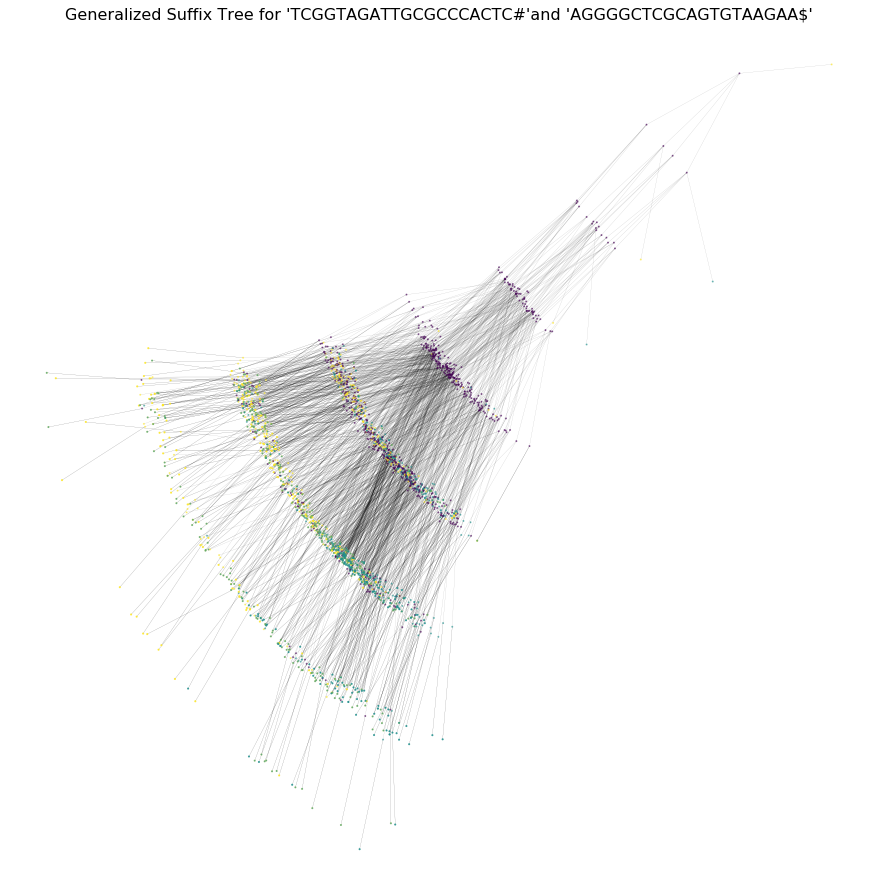

In [48]:
C = {'red':0.25, 'blue':0.5, 'purple':0.75}
CMAP=[]
for key in list(Colour.keys()):
    CMAP.append(C[Colour[key]])

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) 

G = nx.DiGraph()
for v in Tree.keys():
    for u in Tree[v].keys():
        G.add_edge(v,u)

nx.draw_kamada_kawai(G, node_color= CMAP, cmap=plt.cm.viridis_r, node_size=1,
                       width=0.1, color='gray', alpha=0.5, arrows=False)
plt.title("Generalized Suffix Tree for 'TCGGTAGATTGCGCCCACTC#'and 'AGGGGCTCGCAGTGTAAGAA$'",
          size=16)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


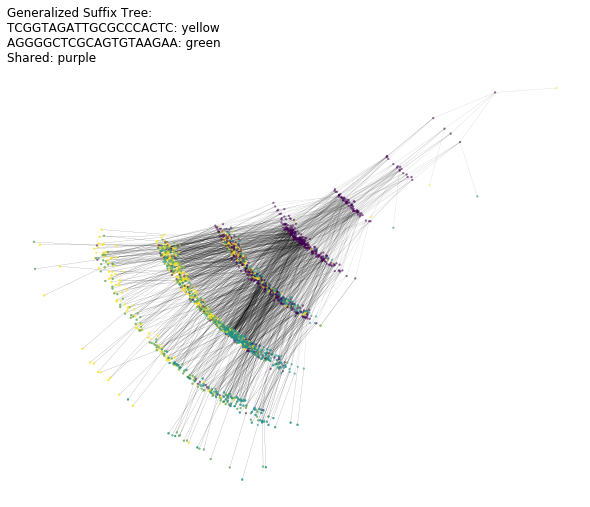

In [57]:
C = {'red':0.25, 'blue':0.5, 'purple':0.75}
CMAP=[]
for key in list(Colour.keys()):
    CMAP.append(C[Colour[key]])

import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6)) 

G = nx.DiGraph()
for v in Tree.keys():
    for u in Tree[v].keys():
        G.add_edge(v,u)

nx.draw_kamada_kawai(G, node_color= CMAP, cmap=plt.cm.viridis_r, node_size=3,
                       width=0.1, color='gray', alpha=0.5, arrows=False)
plt.title("Generalized Suffix Tree:\nTCGGTAGATTGCGCCCACTC: yellow\n\
AGGGGCTCGCAGTGTAAGAA: green\nShared: purple",
          size=12, loc = 'left')

plt.show()

---

##  the Shortest Non-Shared Substring Problem.
---

Shortest Non-Shared Substring Problem: Find the shortest substring of one string that does not appear in another string.

Input: Strings Text1 and Text2.
 
Output: The shortest substring of Text1 that does not appear in Text2.

Sample Input: 
 
CCAAGCTGCTAGAGG  
CATGCTGGGCTGGCT 

Sample Output: 
 
AA 

--
really not sure what the property of the shortest non-shared is...

only looking for subseqs of the first string....
couldn't we just make a tree and see if we can find the subseq in Tree2?
this sounds like a too naive approach.

has to be an edge? that is red,
and it starts at the root? but minus the purple part?

holy fuck this is confusing

am I supposed to use a dijkstra algorithm wtf i dont know..

In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 16 19:13:14 2020

@author: jasonmoggridge
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 15 02:09:15 2020
@author: jasonmoggridge

BA9E - Longest shared substring problem: using coloured suffix tree

In “Find the Longest Repeat in a String”, we encountered the Longest Repeat
 Problem, which could be solved using a suffix tree.

The second additional exercise that we will consider is below.

Longest Shared Substring Problem
Find the longest substring shared by two strings.

Given: Strings Text1 and Text2.

Return: The longest substring that occurs in both Text1 and Text2.
 (Multiple solutions may exist, in which case you may return any one.)

Sample Dataset
TCGGTAGATTGCGCCCACTC
AGGGGCTCGCAGTGTAAGAA
Sample Output
AGA

"""



def coloured_suffix_trie(Text1, Text2):
    """ Constructs a Suffix Trie from Text for later collapsing and making Suffix Tree """
    
    Text = Text1 + Text2
    split = len(Text1)
    
    Trie = {0:{}}
    for i in range(len(Text)-1):  # $ is handled afterwards
        v = 0
        for j in range(i, len(Text)-1):
            for dest in Trie[v].keys():
                if Text[j] in Trie[v][dest]:
                    v = dest
                    break
            else:
                w = len(Trie.keys())
                Trie[w] = {}
                Trie[v][w] = (Text[j], j, 'grey') # add v:w(symbol, @ position -> 0-indexed)
                v = w

        # set leaf node(w)'s label = -(start position (i) +1)
        w = -(i+1)

        colour = 'red'
        if i >= split:
            colour = 'blue'
        Trie[w]= {colour}
        # add final edge to leaf
        Trie[v][w] = ('$', j+1, colour) # end of suffix ($, end position -> 0-indexed)

    return Trie
    #

def get_NB_paths(Trie):
    """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
    """ non-branching paths for collapsing to create Tree from Trie"""

    Paths = []

    # identify branchpoints from all nodes
    for v in Trie.keys():
        if Trie[v]:
            if len(Trie[v]) > 1:

                # start a path for each branchpoint
                for dest in Trie[v].keys():
                    path = [v]

                    # when visiting NB v, add dest to path;
                    # if new dest is a leaf, save path & break
                    while len(Trie[dest]) == 1:
                        source = dest
                        path.append(source)
                        dest = next(iter(Trie[source]))
                        if dest in ('red','blue'):
                            break
                    path.append(dest)
                    Paths.append(path)
#
#    print('\n ----- NonBranchingPaths:---------\n',\
#          '\n'.join(str(path) for path in Paths))
    return Paths
#
 

def coloured_suffix_tree(Trie, nb_paths):
    
    """Tree{source: dest:(position, length)
        Colour[node] = red, blue, or grey
    """
    Tree = {}
    Colour = {0:'grey'}
    for path in nb_paths:
        
        
        position = Trie[path[0]][path[1]][1]
        if path[-1] in ('red','blue'):
            colour = path.pop()
        else:
            colour = 'grey'
        if path[0] not in Tree.keys():
            Tree[path[0]] = {path[-1]:(position, len(path)-1)}
            Colour[path[-1]] = colour
        else:
            Tree[path[0]][path[-1]] = (position, len(path)-1)
            Colour[path[-1]] = colour
            
    return Tree, Colour
#
    

def colour_tree(Tree, Colour):
            
    while 'grey' in Colour.values(): # while ripe nodes...
        
        for v in Tree.keys():
            if Colour[v] == 'grey':
                
                ripe = True
                for u in Tree[v].keys():
                    if Colour[u] == 'grey':
                        ripe = False
                
                if ripe:
                    Colour[v] = Colour[next(iter(Tree[v]))]
                    for u in Tree[v]:
                        if Colour[u] != Colour[v]:
                            Colour[v] = 'purple'
                            break

    return Tree, Colour
#



def shortest_uncommon_substring(Tree, Colour, Text):
    
    def Decrease_key(heap, v):   
        """
        # Find the node and remove it from heap, replace at proper distance.
        # items in heap are (node, Distance[node])
        """
        for node in heap:
            if node[0] == v:
                heap.remove(node)
                break
    
        for node in heap:
            if distance[node[0]] > distance[v]:
                ins = heap.index(node)
                heap.insert(ins, (v, distance[v]))
                break
    
    
    # initial distance array, heap, parent pointer
    
    distance = {node:float('inf') for node in Colour.keys()}
    distance[0] = 0
    heap = [(node, float('inf')) for node in Colour.keys()]
    heap[0] = (0,0)
    prev = {node:None for node in Colour.keys()}
    
    shortest = float('inf')
    shortests = []

    while heap:
    
        (v, dist) = heap.pop(0)                       
        if dist > shortest+2:
            
            break
        
        elif Colour[v] =='red':
            (s,l) = Tree[prev[v]][v]
            if dist< shortest:
                shortest = dist
            shortests.append(Text[s+l-dist:s+1])
                
        elif v in Tree.keys():
            for u in Tree[v]:
                prev[u] = v            
                distance[u] = distance[v] + Tree[v][u][1]
                Decrease_key(heap, u)
    
    shortests = [x for x in shortests if len(x)<=shortest]
    
    return shortests     
   

In [59]:
### Main ###
    
## Sample Input:
#
Text1 = "anaman#"
Text2 = "ananamn$"

with open("data/suss_extra.txt",'r') as infile:
##
#with open("data/dataset_296_7.txt",'r') as infile:

    Text1 = infile.readline().strip() + "#"
    Text2 = infile.readline().strip() + "$"
    

Text = Text1 + Text2
Trie = coloured_suffix_trie(Text1, Text2)
#del(Text1, Text2)

nb_paths = get_NB_paths(Trie)
Tree, Colour = coloured_suffix_tree(Trie, nb_paths)
del(Trie, nb_paths)

Tree, Colour = colour_tree(Tree, Colour)


# Remove the edge that goes from root to # and is red. don't want empty string
#
##
#del Tree[0][-len(Text1)]
#del Colour[-len(Text1)]

shortests = shortest_uncommon_substring(Tree, Colour, Text)
sliding = set()
for i in range(len(Text1)-5):
    if Text1[i:i+5] not in Text2:
        sliding.add(Text1[i:i+5])
#
#print(sliding)
#
#for shortest in shortests:
#    print(shortest)
#    if shortest in Text2:
#        print('\tNOT in Text2')
if shortests[-1] not in Text2:
    print(shortests[-1])

len(shortests)

len(sliding)

AATTC


238

In [2]:
"""Longest Shared Substring Problem

Find the longest substring shared by two strings.

Given: Strings Text1 and Text2.

Return: The longest substring that occurs in both Text1 and Text2.
 (Multiple solutions may exist, in which case you may return any one.)

Sample Dataset
TCGGTAGATTGCGCCCACTC
AGGGGCTCGCAGTGTAAGAA

Sample Output
AGA
"""
def LCSS(Text1,Text2):
    
    def coloured_suffix_trie(Text1, Text2):
        """ coloured Suffix Trie from concatenated Texts"""

        Text = Text1 + Text2
        split = len(Text1)

        Trie = {0:{}}
        for i in range(len(Text)-1):  # $ is handled afterwards
            v = 0
            for j in range(i, len(Text)-1):
                for dest in Trie[v].keys():
                    if Text[j] in Trie[v][dest]:
                        v = dest
                        break
                else:
                    w = len(Trie.keys())
                    Trie[w] = {}
                    Trie[v][w] = (Text[j], j, 'grey') # add v:w(symbol, position, colour)
                    v = w

            # set leaf node(w)'s label = -(start position (i) +1)
            w = -(i+1)

            # set the colour label at leaf for 

            colour = 'red'
            if i >= split:
                colour = 'blue'
            Trie[w]= {colour}
            # add final edge to leaf
            Trie[v][w] = ('$', j+1, colour) # end of suffix ($, end position -> 0-indexed)

        return Trie
        #

    def get_NB_paths(Trie):
        """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
        """ non-branching paths for collapsing to create Tree from Trie"""

        Paths = []

        # identify branchpoints from all nodes
        for v in Trie.keys():
            if Trie[v]:
                if len(Trie[v]) > 1:

                    # start a path for each branchpoint
                    for dest in Trie[v].keys():
                        path = [v]

                        # when visiting NB v, add dest to path;
                        # if new dest is a leaf, save path & break
                        while len(Trie[dest]) == 1:
                            source = dest
                            path.append(source)
                            dest = next(iter(Trie[source]))
                            if dest in ('red','blue'):
                                break
                        path.append(dest)
                        Paths.append(path)
    #
    #    print('\n ----- NonBranchingPaths:---------\n',\
    #          '\n'.join(str(path) for path in Paths))
        return Paths
    #


    def coloured_suffix_tree(Trie, nb_paths):
        """makes suffix tree from suffix trie given non-branching paths list
        returns Tree and Colour, a seperate dict of {node:colour} pairs"""

        Tree = {}
        Colour = {0:'grey'}
        for path in nb_paths:
            position = Trie[path[0]][path[1]][1]
            if path[-1] in ('red','blue'):
                colour = path.pop()
            else:
                colour = 'grey'
            if path[0] not in Tree.keys():
                Tree[path[0]] = {path[-1]:(position, len(path)-1)}
                Colour[path[-1]] = colour
            else:
                Tree[path[0]][path[-1]] = (position, len(path)-1)
                Colour[path[-1]] = colour
        return Tree, Colour
    #


    def colour_tree(Tree, Colour):
        """set colour for internal nodes"""

        while 'grey' in Colour.values(): # while ripe nodes...
            for v in Tree.keys():
                if Colour[v] == 'grey':
                    ripe = True
                    for u in Tree[v].keys():
                        if Colour[u] == 'grey':
                            ripe = False
                    if ripe:
                        Colour[v] = Colour[next(iter(Tree[v]))]
                        for u in Tree[v]:
                            if Colour[u] != Colour[v]:
                                Colour[v] = 'purple'
                                break
        return Tree, Colour
    #

    def longest_common_substring(Tree, Colour):
        """DFS search to find the longest shared substrings in Text1 & Text2"""
        def dfs(v, Tree, length):
            nonlocal best_length
            nonlocal best_start
            # case if v is a leaf -> see if last node was longest repeat
            # start is (leaf*-1) and -1 to get 0-indexed position
            if v < 0:
                if length >= best_length: # arbitrary last one if there is a tie for longest
                    best_length = length
                    best_start = (v*-1) -1
                return

            for w in Tree[v]:
                if w > 0:
                    dfs(w, Tree, length + Tree[v][w][1])
                elif Colour[v] == 'purple': # added condition for 'shared between text1+2'
                    dfs(w, Tree, length)

        #
        best_length = -1
        best_start = float('inf')
        dfs(0, Tree, 0)
        return (best_start, best_length)
    #
    
    Text = Text1 + Text2
    Trie = coloured_suffix_trie(Text1, Text2)
    del(Text1, Text2)

    nb_paths = get_NB_paths(Trie)
    Tree, Colour = coloured_suffix_tree(Trie, nb_paths)
    del(Trie, nb_paths)

    Tree, Colour = colour_tree(Tree, Colour)
    (s, l) = longest_common_substring(Tree, Colour)
    lcss = Text[s:s+l]
    print('(s,l)',(s,l))
    print(Text[s:s+l])

    return lcss, Tree, Colour

In [3]:
### Main ###
Text1 = "TCGGTAGATTGCGCCCACTC#"
Text2 = "AGGGGCTCGCAGTGTAAGAA$"

Text=Text1+Text2

longest, Tree, Colour = LCSS(Text1, Text2)
#
#CATTTTAACT

(s,l) (37, 3)
AGA


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


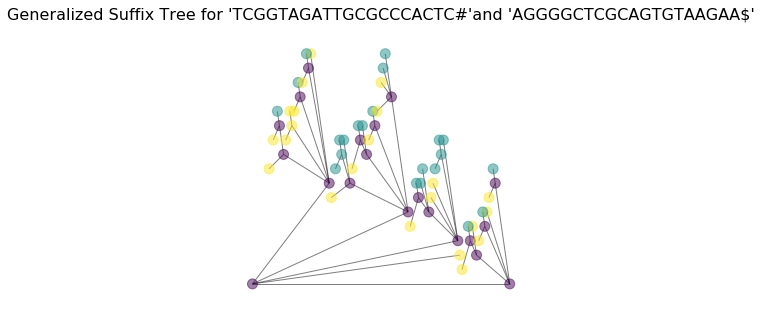

In [53]:
C = {'red':0.25, 'blue':0.5, 'purple':0.75}
CMAP=[]
for key in list(Colour.keys()):
    CMAP.append(C[Colour[key]])

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4)) 

G = nx.DiGraph()
for v in Tree.keys():
    for u in Tree[v].keys():
        G.add_edge(v, u, weight = Tree[v][u][1])

nx.draw_planar(G, node_color= CMAP, cmap=plt.cm.viridis_r, node_size=100,
                       color='gray', alpha=0.5, arrows=False) #width
plt.title("Generalized Suffix Tree for 'TCGGTAGATTGCGCCCACTC#'and 'AGGGGCTCGCAGTGTAAGAA$'",
          size=16)
plt.show()

In [10]:
def drawConfig(self, config):  
        G = nx.Graph()
        alternating=[]
        sizes=[]
        colors=[]
        for i in range(self.N):
            alternating.append(self.philosophers[i])
            sizes.append(30000/self.N) 
            colors.append('skyblue')
            alternating.append(self.chopsticks[i])
            sizes.append(5000/self.N)
            colors.append('yellow')

        G.add_nodes_from(alternating)
        for i in range(self.N):
            c = self.chopsticks[i]
            if (config[c + '_L']):
                G.add_edge(c, self.philosophers[i])
            if (config[c + '_R']):
                G.add_edge(c, self.philosophers[(i+1) % self.N])

        nx.draw_circular(G, with_labels=True, node_size=sizes, node_color=colors, node_shape='o')
        plt.show() 
drawConfig()

TypeError: drawConfig() missing 2 required positional arguments: 'self' and 'config'

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


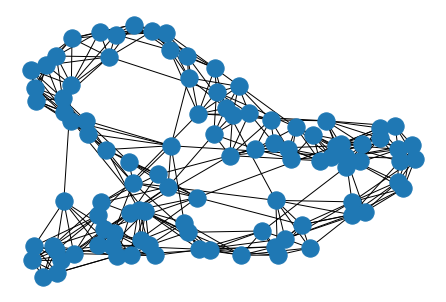

In [11]:
g = nx.watts_strogatz_graph(100, 8, 0.1)
nx.draw(g)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


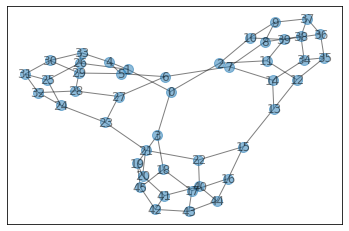

In [33]:
red = nx.tutte_graph()
nx.draw_networkx(red, alpha=0.5, size=5, node_size=100)